In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/london-bike-sharing-dataset/london_merged.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
data = pd.read_csv("/kaggle/input/london-bike-sharing-dataset/london_merged.csv")

In [4]:
data.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [5]:
data.shape

(17414, 10)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
cnt,17414.0,1143.101642,1085.108068,0.0,257.0,844.0,1671.75,7860.0
t1,17414.0,12.468091,5.571818,-1.5,8.0,12.5,16.00,34.0
t2,17414.0,11.520836,6.615145,-6.0,6.0,12.5,16.00,34.0
hum,17414.0,72.324954,14.313186,20.5,63.0,74.5,83.00,100.0
wind_speed,17414.0,15.913063,7.894570,0.0,10.0,15.0,20.50,56.5
weather_code,17414.0,2.722752,2.341163,1.0,1.0,2.0,3.00,26.0
is_holiday,17414.0,0.022051,0.146854,0.0,0.0,0.0,0.00,1.0
is_weekend,17414.0,0.285403,0.451619,0.0,0.0,0.0,1.00,1.0
season,17414.0,1.492075,1.118911,0.0,0.0,1.0,2.00,3.0


In [9]:
data.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [10]:
data['timestamp'] = pd.to_datetime(data['timestamp'])

In [11]:
data['year'] = data['timestamp'].dt.year
data['month'] = data['timestamp'].dt.month
data['day'] = data['timestamp'].dt.day

In [12]:
data['dayofweek'] = data['timestamp'].dt.dayofweek

In [13]:
data.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day,dayofweek
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,4,6
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,4,6
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,4,6
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,4,6
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,4,6


In [14]:
data['season'].value_counts(ascending=False)

season
0.0    4394
1.0    4387
3.0    4330
2.0    4303
Name: count, dtype: int64

In [15]:
data['is_weekend'].value_counts(ascending=False)

is_weekend
0.0    12444
1.0     4970
Name: count, dtype: int64

In [16]:
data['weather_code'].value_counts(ascending=False)

weather_code
1.0     6150
2.0     4034
3.0     3551
7.0     2141
4.0     1464
26.0      60
10.0      14
Name: count, dtype: int64

In [17]:
def remove_outliers_iqr(data, column, factor=1.5):
    df = data.copy()

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - (factor * IQR)
    upper_bound = Q3 + (factor * IQR)

    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df

In [18]:
cleaned_df = remove_outliers_iqr(data, 't1', 1.5)
print("원본 데이터 형태: ", data.shape)
print("t1 컬럼의 원본 통계:")
print(data['t1'].describe())
print("이상치 제거 후: ", cleaned_df.shape)
print("t1 컬럼 이상치 제거 후:")
print(cleaned_df['t1'].describe())

원본 데이터 형태:  (17414, 14)
t1 컬럼의 원본 통계:
count    17414.000000
mean        12.468091
std          5.571818
min         -1.500000
25%          8.000000
50%         12.500000
75%         16.000000
max         34.000000
Name: t1, dtype: float64
이상치 제거 후:  (17350, 14)
t1 컬럼 이상치 제거 후:
count    17350.000000
mean        12.401547
std          5.472159
min         -1.500000
25%          8.000000
50%         12.500000
75%         16.000000
max         28.000000
Name: t1, dtype: float64


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


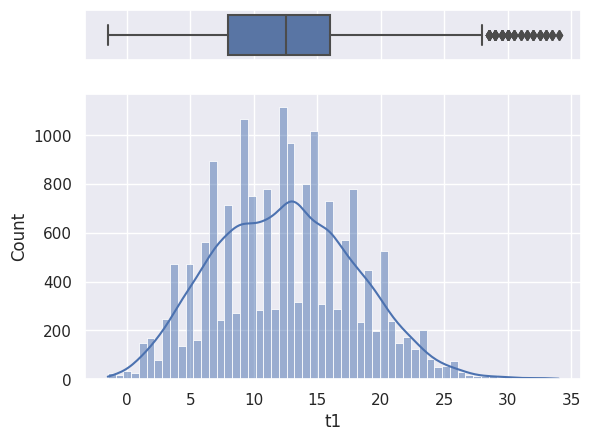

In [19]:
sns.set(style='darkgrid')
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=data, x='t1', ax=ax_box)
sns.histplot(data=data, x='t1', ax=ax_hist, kde=True)
ax_box.set(xlabel='')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


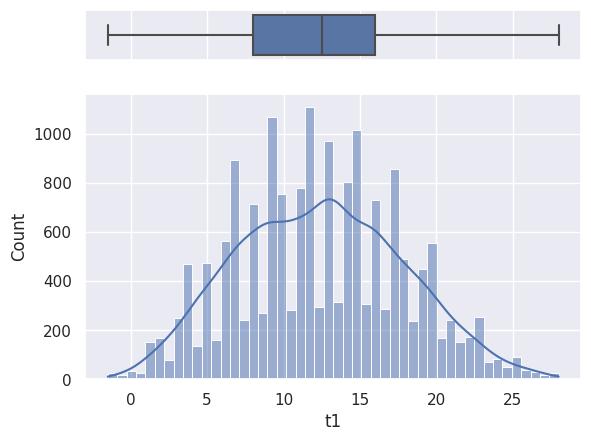

In [20]:
sns.set(style='darkgrid')
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=cleaned_df, x='t1', ax=ax_box)
sns.histplot(data=cleaned_df, x='t1', ax=ax_hist, kde=True)
ax_box.set(xlabel='')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


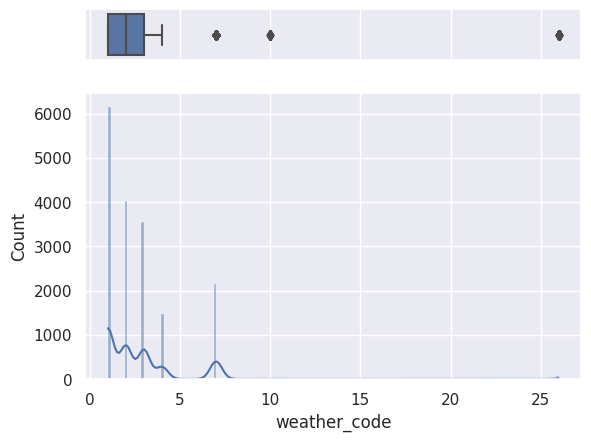

In [21]:
# 날씨 코드에 따른 데이터 시각화
sns.set(style='darkgrid')
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=data, x='weather_code', ax=ax_box)
sns.histplot(data=data, x='weather_code', ax=ax_hist, kde=True)
ax_box.set(xlabel='')
plt.show()

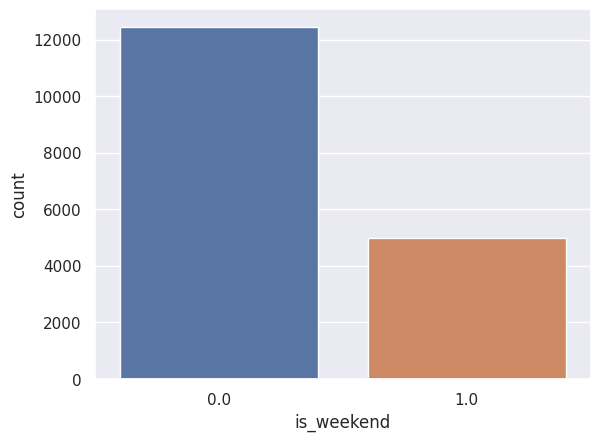

In [36]:
sns.set(style='darkgrid')
f, ax_hist = plt.subplots()
sns.countplot(data=data, x='is_weekend')
plt.show()

year
2016    49.95406
2015    49.63248
2017     0.41346
Name: proportion, dtype: float64


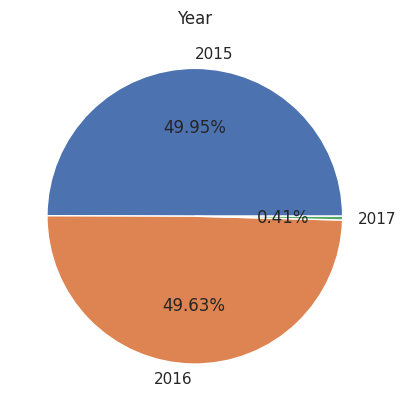

In [40]:
year_count = data['year'].value_counts(normalize=True) * 100
print(year_count)
plt.pie(year_count, labels=['2015', '2016', '2017'], autopct='%1.2f%%')
plt.title("Year")
plt.show()

## 결측치 처리 방식
- 중앙값으로 대체
- 최빈값으로 대체
- 바로 이전 값으로 대체
- 평균 값으로 대체

## 이상치 처리 방식
- 제거: IQR, z-score 등 기준
- 대체: 평균, 중앙값, 분위수, 모델 예측 등
- 스케일링으로 완화: log 변환, Scaler 활용 등